In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [2]:
df=pd.read_csv('/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/notebooks/processedstopword.csv')

In [3]:
# Reducir el dataset a una muestra del 20%
df_sample = df.sample(frac=0.2, random_state=42)  # Tomamos solo el 20% de los dato

In [5]:

# Extraer características y etiquetas nuevamente
X_sample = df_sample['text']
y_sample = df_sample['label']

In [6]:
vectorizer = TfidfVectorizer(max_features=1000)  # Limitar a 5000 características para optimización
X_tfidf = vectorizer.fit_transform(X_sample)


In [7]:
 #Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_sample, test_size=0.2, random_state=42)


## XG-Boost

In [8]:
# Entrenar el modelo XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)


/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:44:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [9]:
# Predicciones
y_pred = xgb_model.predict(X_test)

# Evaluar el modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
conf_matrix, class_report


(array([[915,   9],
        [  3, 861]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       924\n           1       0.99      1.00      0.99       864\n\n    accuracy                           0.99      1788\n   macro avg       0.99      0.99      0.99      1788\nweighted avg       0.99      0.99      0.99      1788\n')

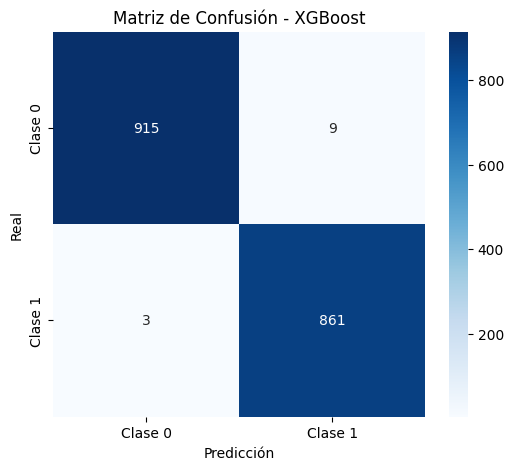

/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:52:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:53:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learning_Fake_News/.venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [18:53:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/isaromobru/Desktop/FakeNews 10.57.24/proyecto_machine_learni

(np.float64(0.9951890924887549), np.float64(0.0010376828648315493))

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap([[915, 9], [3, 861]], annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - XGBoost')
plt.show()

# Evaluación de overfitting usando validación cruzada
cv_scores = cross_val_score(xgb_model, X_tfidf, y_sample, cv=5, scoring='accuracy')

# Mostrar los resultados de validación cruzada
cv_scores.mean(), cv_scores.std()


## Gradient boosting

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Entrenar el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)

# Predicciones
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Mostrar los resultados
conf_matrix_gb, class_report_gb

(array([[4617,   31],
        [  14, 4276]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      0.99      1.00      4648\n           1       0.99      1.00      0.99      4290\n\n    accuracy                           0.99      8938\n   macro avg       0.99      1.00      0.99      8938\nweighted avg       0.99      0.99      0.99      8938\n')

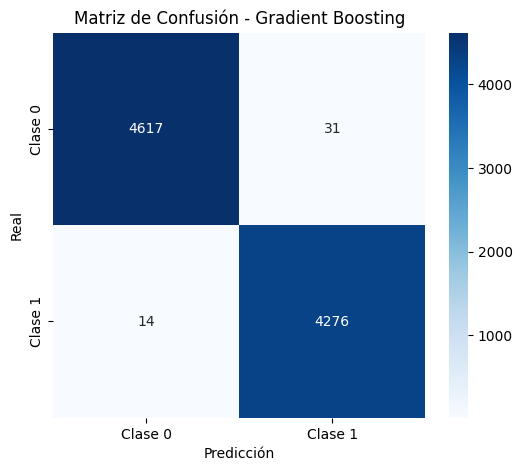

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar la matriz de confusión para Gradient Boosting
plt.figure(figsize=(6, 5))
sns.heatmap([[4617, 31], [14, 4276]], annot=True, fmt='d', cmap='Blues', xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Gradient Boosting')
plt.show()


## NP-Bayes

In [8]:
from sklearn.naive_bayes import MultinomialNB
# Entrenamiento
model = MultinomialNB()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[4395  253]
 [ 295 3995]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      4648
           1       0.94      0.93      0.94      4290

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938



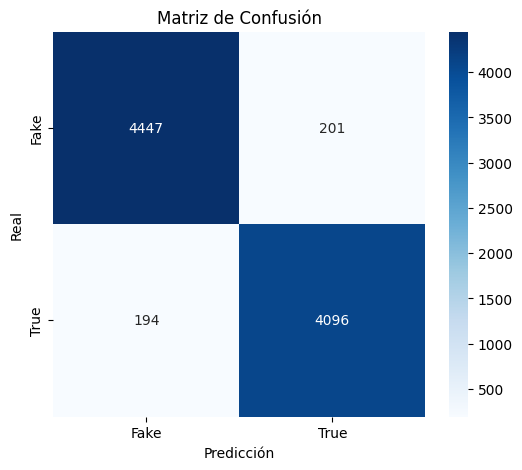

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Definir valores de la matriz de confusión
cm = np.array([[4447, 201],
               [194, 4096]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show();


# Random Forest


In [10]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Mostrar los resultados
conf_matrix_rf, class_report_rf


(array([[4639,    9],
        [  12, 4278]]),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      4648\n           1       1.00      1.00      1.00      4290\n\n    accuracy                           1.00      8938\n   macro avg       1.00      1.00      1.00      8938\nweighted avg       1.00      1.00      1.00      8938\n')

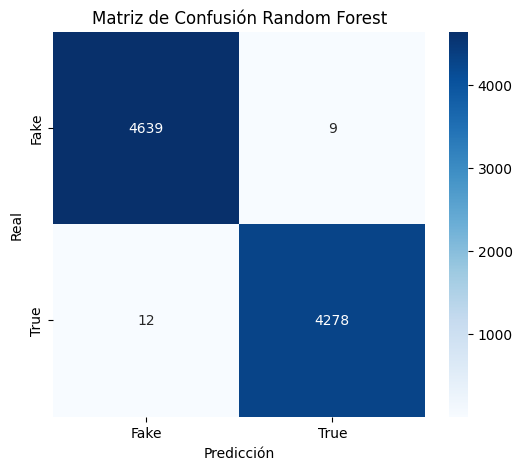

In [11]:
# Definir valores de la matriz de confusión
cm = np.array([[4639, 9],
               [12, 4278]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Random Forest')
plt.show();


## Supervector Machine

In [12]:
from sklearn.svm import SVC
# Entrenar el modelo SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluar el modelo
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Mostrar los resultados
conf_matrix_svm, class_report_svm

(array([[4620,   28],
        [  43, 4247]]),
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      4648\n           1       0.99      0.99      0.99      4290\n\n    accuracy                           0.99      8938\n   macro avg       0.99      0.99      0.99      8938\nweighted avg       0.99      0.99      0.99      8938\n')

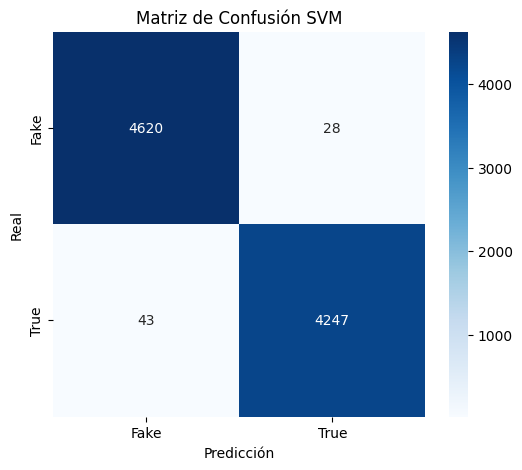

In [13]:
# Definir valores de la matriz de confusión
cm = np.array([[4620, 28],
               [43, 4247]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión SVM')
plt.show();


## Regresión Logística

In [14]:
from sklearn.linear_model import LogisticRegression
# Entrenar el modelo de Regresión Logística
logreg_model = LogisticRegression(max_iter=500, solver='liblinear')  # Solver optimizado para datos grandes
logreg_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
class_report_logreg = classification_report(y_test, y_pred_logreg)

# Mostrar los resultados
conf_matrix_logreg, class_report_logreg

(array([[4589,   59],
        [  65, 4225]]),
 '              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99      4648\n           1       0.99      0.98      0.99      4290\n\n    accuracy                           0.99      8938\n   macro avg       0.99      0.99      0.99      8938\nweighted avg       0.99      0.99      0.99      8938\n')

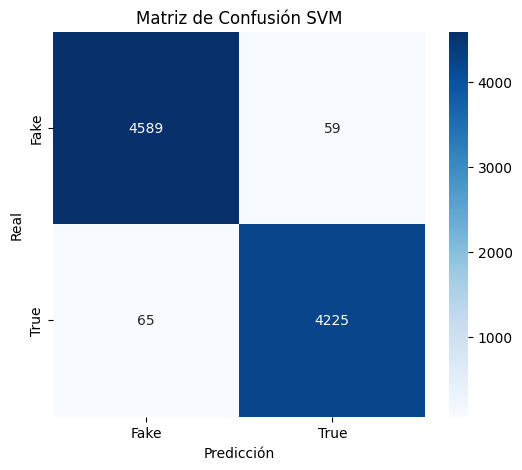

In [15]:
# Definir valores de la matriz de confusión
cm = np.array([[4589, 59],
               [65, 4225]])

# Etiquetas de las clases
labels = ['Fake', 'True']

# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión SVM')
plt.show();


In [ ]:

# Aplicar validación cruzada (3 folds para optimizar memoria)
cv_scores = cross_val_score(gb_model, X_sample_tfidf, y_sample, cv=3, scoring='accuracy')

# Mostrar resultados de validación cruzada (promedio y desviación estándar)
cv_scores.mean(), cv_scores.std()
